In [1]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("./datasets/nba_logreg.csv")
data.fillna(0, inplace=True)
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [3]:
data.shape

(1340, 21)

In [4]:
data.groupby('TARGET_5Yrs').size()

TARGET_5Yrs
0.0    509
1.0    831
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
Name           1340 non-null object
GP             1340 non-null int64
MIN            1340 non-null float64
PTS            1340 non-null float64
FGM            1340 non-null float64
FGA            1340 non-null float64
FG%            1340 non-null float64
3P Made        1340 non-null float64
3PA            1340 non-null float64
3P%            1340 non-null float64
FTM            1340 non-null float64
FTA            1340 non-null float64
FT%            1340 non-null float64
OREB           1340 non-null float64
DREB           1340 non-null float64
REB            1340 non-null float64
AST            1340 non-null float64
STL            1340 non-null float64
BLK            1340 non-null float64
TOV            1340 non-null float64
TARGET_5Yrs    1340 non-null float64
dtypes: float64(19), int64(1), object(1)
memory usage: 220.0+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,1340.0,60.414179,17.433992,11.0,47.000,63.00,77.0,82.0
MIN,1340.0,17.624627,8.307964,3.1,10.875,16.10,22.9,40.9
PTS,1340.0,6.801493,4.357545,0.7,3.700,5.55,8.8,28.2
FGM,1340.0,2.629104,1.683555,0.3,1.400,2.10,3.4,10.2
FGA,1340.0,5.885299,3.593488,0.8,3.300,4.80,7.5,19.8
FG%,1340.0,44.169403,6.137679,23.8,40.200,44.10,47.9,73.7
3P Made,1340.0,0.247612,0.383688,0.0,0.000,0.10,0.4,2.3
3PA,1340.0,0.779179,1.061847,0.0,0.000,0.30,1.2,6.5
3P%,1340.0,19.149627,16.051861,0.0,0.000,22.20,32.5,100.0
FTM,1340.0,1.297687,0.987246,0.0,0.600,1.00,1.6,7.7


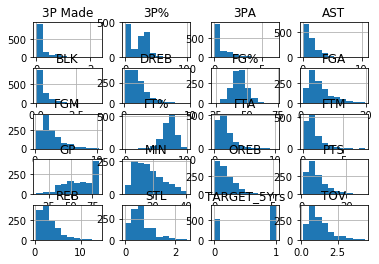

In [7]:
data.hist()
plt.show()

In [8]:
def pairwise_correlation_pearson(dataframe):
    d_corr_p = dataframe.drop(['Name'], axis=1).corr(method='pearson')
    return d_corr_p

In [9]:
corr = pairwise_correlation_pearson(data)
corr.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('Oranges'), axis=0)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.0,0.59,0.54,0.54,0.52,0.3,0.11,0.099,0.037,0.48,0.48,0.2,0.4,0.47,0.46,0.37,0.45,0.28,0.52,0.4
MIN,0.59,1.0,0.91,0.9,0.91,0.2,0.39,0.4,0.17,0.79,0.78,0.24,0.57,0.75,0.71,0.63,0.76,0.4,0.83,0.32
PTS,0.54,0.91,1.0,0.99,0.98,0.26,0.35,0.36,0.15,0.9,0.88,0.26,0.58,0.69,0.68,0.55,0.68,0.39,0.85,0.32
FGM,0.54,0.9,0.99,1.0,0.98,0.29,0.29,0.3,0.12,0.85,0.84,0.22,0.6,0.7,0.69,0.53,0.66,0.4,0.83,0.32
FGA,0.52,0.91,0.98,0.98,1.0,0.13,0.39,0.41,0.2,0.83,0.81,0.27,0.5,0.64,0.61,0.59,0.69,0.32,0.85,0.29
FG%,0.3,0.2,0.26,0.29,0.13,1.0,-0.29,-0.35,-0.34,0.25,0.3,-0.16,0.51,0.41,0.47,-0.11,0.057,0.39,0.12,0.23
3P Made,0.11,0.39,0.35,0.29,0.39,-0.29,1.0,0.98,0.59,0.16,0.095,0.31,-0.22,0.017,-0.073,0.38,0.31,-0.16,0.26,0.037
3PA,0.099,0.4,0.36,0.3,0.41,-0.35,0.98,1.0,0.58,0.17,0.11,0.32,-0.23,0.011,-0.081,0.41,0.34,-0.17,0.28,0.018
3P%,0.037,0.17,0.15,0.12,0.2,-0.34,0.59,0.58,1.0,0.036,-0.027,0.33,-0.29,-0.13,-0.19,0.27,0.2,-0.25,0.11,-3.8e-06
FTM,0.48,0.79,0.9,0.85,0.83,0.25,0.16,0.17,0.036,1.0,0.98,0.26,0.58,0.65,0.65,0.48,0.6,0.41,0.8,0.3


# Use a regression models to classify: 

Following algorithms will work correctly with the categorical variables, without additional settings: Logistic regression, Decision tree, Random forest, AdaBoost and others.

## Logistic Regression

In [10]:
data = data.drop(["Name"], axis = 1) 
data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [11]:
features = data.drop(["TARGET_5Yrs"], axis = 1) 
output = data["TARGET_5Yrs"] 

In [12]:
features_train, features_test, output_train, output_test = train_test_split(features, output, train_size = 0.7, test_size = 0.3)

In [13]:
print("features_train:", features_train.shape)
print("output_train:", output_train.shape)
print("features_test:", features_test.shape)
print("output_test:", output_test.shape)

features_train: (937, 19)
output_train: (937,)
features_test: (402, 19)
output_test: (402,)


For logistic regression its important following things:
- Binary Output Variable: logistic regression is intended for binary classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.
- Logistic regression assumes no error in the output variable (y).
- Gaussian Distribution: Logistic regression is a linear algorithm (with a non-linear transform on output). It does assume a linear relationship between the input variables with the output. 
- Remove Correlated Inputs: the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.

Regularization does not improve the performance on the data set that the algorithm used to learn the model parameters. However, it can improve the performance on new, unseen data.

In our case we can think of regularization of increasing the bias, because the model suffers from (high) variance (i.e., it overfits the training data). On the other hand, too much bias will result in underfitting (a characteristic indicator of high bias is that the model shows a "bad" performance for both the training and test dataset). We know that our goal in an unregularized model is to minimize the cost function, i.e., we want to find the feature weights that correspond to the global cost minimum.

The results shows high regularization (parameter C is small), score is OK (about 90%).
In case of overfitting the model just tries to learn pecularities of the training set and does not work well on unseen examples that differ from the training set. In our case, model is performing well in both - training and inseen examples.

In [14]:
tuned_params = [{"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 1e6], 
                 "max_iter": [1, 5, 10, 20, 30, 50, 100, 300, 1000],
                  "fit_intercept": [True,False]}]
grid_search = GridSearchCV(LogisticRegression(), tuned_params, scoring = "f1" )
best_model = grid_search.fit(features_train, output_train)
best_params_ = best_model.best_estimator_.get_params()
y_pred = best_model.predict_proba(features_test)[:, 1]
score = best_model.score(features_test, output_test)
precision, recall, _ = roc_curve(output_test, y_pred, pos_label = 1)
print("Best params:", best_params_)
print("Best score:", round(grid_search.best_score_, 3))
print("Score:", round(score, 3))

/usr/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/s

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/s

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/s

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/s

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/s

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/s

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/s

Best params: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 30, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best score: 0.761
Score: 0.803


/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/s

When we make a binary prediction, there can be 4 types of errors:

We predict 0 while we should have the class is actually 0: this is called a True Negative, i.e. we correctly predict that the class is negative (0). In our case, did not detect a disease.

We predict 0 while we should have the class is actually 1: this is called a False Negative, i.e. we incorrectly predict that the class is negative (0). In our case, failed to detect a disease.

We predict 1 while we should have the class is actually 0: this is called a False Positive, i.e. we incorrectly predict that the class is positive (1). In our case, considered detect a disease.

We predict 1 while we should have the class is actually 1: this is called a True Positive, i.e. we correctly predict that the class is positive (1). In our case, rightfully detected a disease.

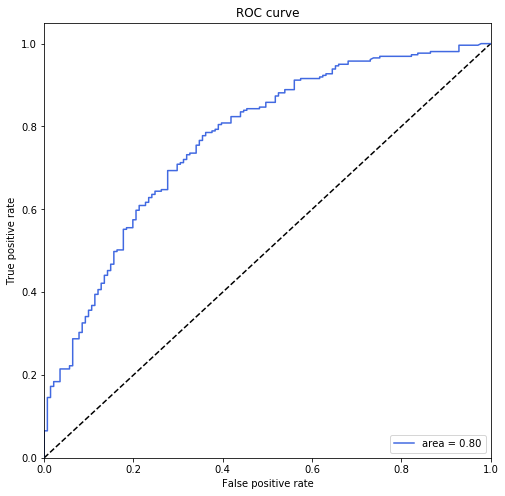

In [15]:
plt.rcParams["figure.figsize"] = [8, 8]
plt.plot([0, 1], [0, 1], "k--")
plt.plot(precision, recall, color="royalblue", label="area = %0.2f" % score)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc="lower right")
plt.show()

True positive rate (TPR), hit rate, and recall, which is defined as TPTP+FN. 

Intuitively this metric corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points. 

In other words, the higher TPR, the fewer positive data points we will miss.


False positive rate (FPR), which is defined as FPFP+TN. 

Intuitively this metric corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points. 

In other words, the higher FPR, the more negative data points we will missclassified.

The resulting curve of combine the FPR and the TPR into one single metric is called ROC curve

## DecisionTreeClassifier

#### The DecisionTreeClassifier model by itself

Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualised.
- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. 
- Able to handle multi-output problems.
- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

When we construct a decision tree, we split the features based on the information gain.

In [16]:
model_dt = DecisionTreeClassifier().fit(features_train, output_train )
y_pred_dt = model_dt.predict_proba(features_test)[:, 1]
score_dt = model_dt.score(features_test, output_test )
precision_dt, recall_dt, _ = roc_curve(output_test, y_pred_dt, pos_label = 1)
print(round(score_dt,3))

0.632


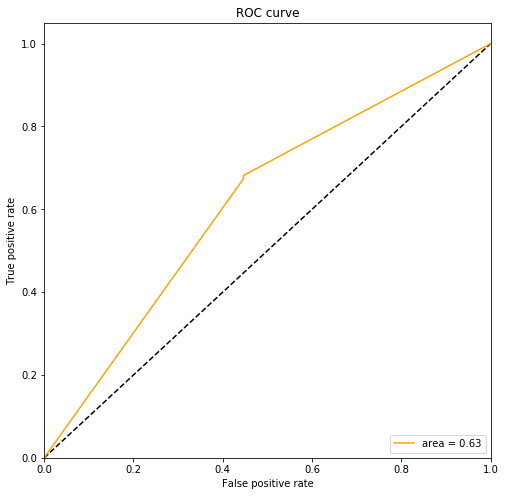

In [17]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(precision_dt, recall_dt, color="orange", label='area = %0.2f' % score_dt)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## KFold with The DecisionTreeClassifier

In [18]:
kfold = StratifiedKFold(n_splits=5).split(features_train, output_train)
params = [{"max_depth": [1, 5, 7, 15, 20], 
                 "min_samples_leaf": [2, 5, 10], 
                 "max_leaf_nodes":[5, 10, 20, 30]}]
grid_search_kfold = GridSearchCV(DecisionTreeClassifier(), params, cv = kfold, scoring = "f1")
best_model_kfold = grid_search_kfold.fit(features_train, output_train)
best_kfold_params_ = grid_search_kfold.best_estimator_.get_params()
y_pred_kfold = best_model_kfold.predict_proba(features_test)[:, 1]
score_kfold = best_model_kfold.score(features_test, output_test)
precision_kfold, recall_kfold, _ = roc_curve(output_test, y_pred_kfold, pos_label = 1)
print("Best params:", best_kfold_params_)
print("Best score:", round(grid_search_kfold.best_score_, 3))
print("Score:", round(score_kfold, 3))

Best params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
Best score: 0.741
Score: 0.755


When an algorithm has much lower training set error than test set error, it suffers from high variance.

The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

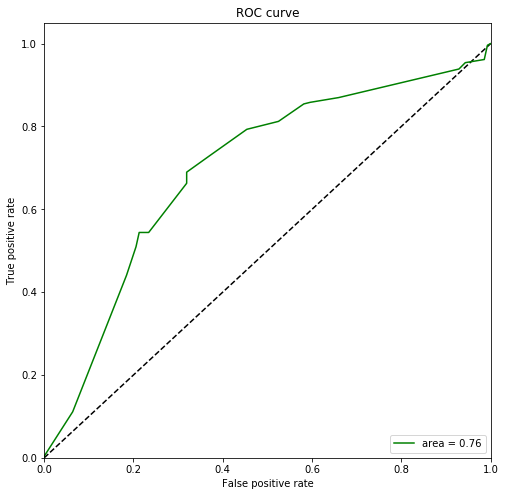

In [19]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(precision_kfold, recall_kfold, color="green", label='area = %0.2f' % score_kfold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## KFold with The RandomForestClassifier

Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

This works well because a single decision tree may be prone to a noise, but aggregate of many decision trees reduce the effect of noise giving more accurate results.
The subsets in different decision trees created may overlap

Basic parameters to Random Forest Classifier can be total number of trees to be generated: n_estimators.

In [20]:
kfold = StratifiedKFold(n_splits=10).split(features_train, output_train)
params = [{"n_estimators": [5, 10, 20, 50, 100],
           "max_depth": [2, 5, 10]}]
grid_search_rf = GridSearchCV(RandomForestClassifier(), params, cv = kfold, scoring = "f1")
best_model_rf = grid_search_rf.fit(features_train, output_train)
best_rf_params_ = grid_search_rf.best_estimator_.get_params()
y_pred_rf = best_model_rf.predict_proba(features_test)[:, 1]
score_rf = best_model_rf.score(features_test, output_test)
precision_rf, recall_rf, _ = roc_curve(output_test, y_pred_rf, pos_label = 1)
print("Best params:", best_rf_params_)
print("Best score:", round(grid_search_rf.best_score_, 3))
print("Score:", round(score_rf, 3))

Best params: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best score: 0.752
Score: 0.778


Number of trees the bigger, the better. You almost can't overshoot with this parameter, but of course the upper limit depends on the computational time you want to spend on RandomForestClassifier.


Number of tried attributes the default is square root of the whole number of attributes, yet usually the forest is not very sensitive about the value of this parameter -- in fact it is rarely optimized, especially because stochastic aspect of RandomForestClassifier may introduce larger variations.

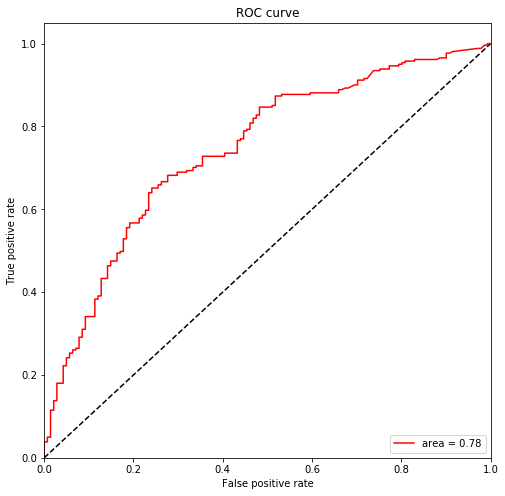

In [21]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(precision_rf, recall_rf, color="red", label='area = %0.2f' % score_rf)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [34]:
target_1 = f1_score(output_test, grid_search_rf.best_estimator_.predict(features_test), pos_label=0)
target_2 = f1_score(output_test, grid_search_rf.best_estimator_.predict(features_test), pos_label=1)

print("no 5 years:", round(target_1, 3))
print("yes 5 years:", round(target_2, 3))
print("best_params_:", grid_search_rf.best_params_  )
print("best_score_:", round(grid_search_rf.best_score_ , 3))

no 5 years: 0.566
yes 5 years: 0.778
best_params_: {'max_depth': 2, 'n_estimators': 50}
best_score_: 0.752


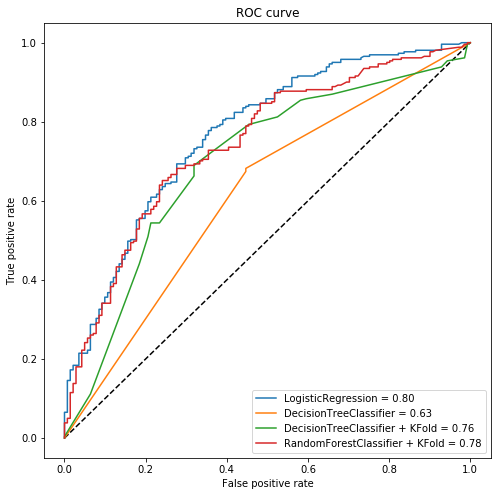

In [23]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(precision, recall, label=('LogisticRegression = %0.2f' % score))
plt.plot(precision_dt, recall_dt, label=('DecisionTreeClassifier = %0.2f' % score_dt ))
plt.plot(precision_kfold, recall_kfold, label=('DecisionTreeClassifier + KFold = %0.2f' % score_kfold))
plt.plot(precision_rf, recall_rf, label=('RandomForestClassifier + KFold = %0.2f' % score_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

The ROC curve shows that the best algorithm again is to perform Logistic Regression on this dataset. 

# Feature transformations with ensembles of trees

An ensemble is just a collection of all predictions to give a final prediction. The reason we use ensembles is that many different predictors trying to predict same target variable will perform a better job than any single predictor alone. Ensembling techniques are further classified into Bagging and Boosting.

First fit an ensemble of trees: totally random trees, a random forest, or gradient boosted trees on the training set bu first will trained a linear model.

Then each leaf of each tree in the ensemble is assigned a fixed arbitrary feature index in a new feature space. These leaf indices are then encoded in a one-hot fashion.

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. We use one hot encoder to perform “binarization” of the category and include it as a feature to train the model.

It is important to train the ensemble of trees on a different subset of the training data than the linear regression model to avoid overfitting, in particular if the total number of leaves is similar to the number of training samples.

Each sample goes through the decisions of each tree of the ensemble and ends up in one leaf per tree. The sample is encoded by setting feature values for these leaves to 1 and the other feature values to 0.

The resulting transformer has then learned a supervised, sparse, high-dimensional categorical embedding of the data.

Boosting is an ensemble technique in which the predictors are not made independently, but sequentially.

This technique employs the logic in which the subsequent predictors learn from the mistakes of the previous predictors. Therefore, the observations have an unequal probability of appearing in subsequent models and ones with the highest error appear most. The predictors can be chosen from a range of models like decision trees, regressors, classifiers etc. Because new predictors are learning from mistakes committed by previous predictors, it takes less time/iterations to reach close to actual predictions. But we have to choose the stopping criteria carefully or it could lead to overfitting on training data. Gradient Boosting is an example of boosting algorithm.

/usr/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while 

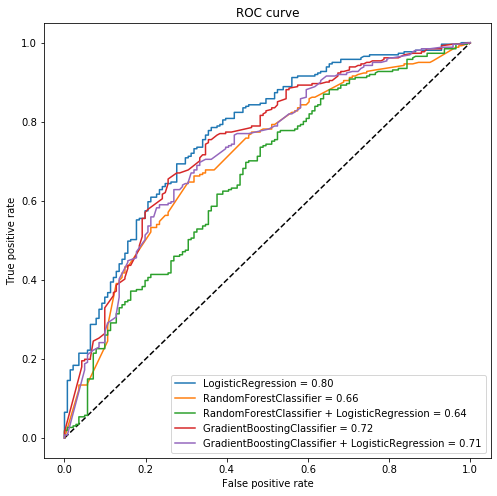

In [24]:
# Unsupervised transformation based on totally random trees
n_estimator = 10
rt = RandomTreesEmbedding(max_depth=5, n_estimators=n_estimator, random_state=0)

features_train, features_train_lr, output_train, output_train_lr = train_test_split(features_train, output_train, test_size=0.7, random_state=0)

#rt_lm = LogisticRegression()
pr, r, _ = roc_curve(output_test, y_pred, pos_label = 1)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=10, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(features_train, output_train)
rf_enc.fit(rf.apply(features_train))
rf_lm.fit(rf_enc.transform(rf.apply(features_train_lr)), output_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(features_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(output_test, y_pred_rf_lm, pos_label = 1)
score_rf_lm = rf_lm.score(rf_enc.transform(rf.apply(features_test)), output_test)

grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(features_train, output_train)
grd_enc.fit(grd.apply(features_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(features_train_lr)[:, :, 0]), output_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(features_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(output_test, y_pred_grd_lm, pos_label = 1)
score_grd_lm = grd_lm.score(grd_enc.transform(grd.apply(features_train_lr)[:, :, 0]), output_train_lr)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(features_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(output_test, y_pred_grd, pos_label = 1)
score_grd = grd.score(features_test, output_test)


# The random forest model by itself
y_pred_rf = rf.predict_proba(features_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(output_test, y_pred_rf, pos_label = 1)
score_rf = rf.score(features_test, output_test)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(pr, r, label=('LogisticRegression = %0.2f' % score))
plt.plot(fpr_rf, tpr_rf, label=('RandomForestClassifier = %0.2f' % score_rf))
plt.plot(fpr_rf_lm, tpr_rf_lm, label=('RandomForestClassifier + LogisticRegression = %0.2f' % score_rf_lm ))
plt.plot(fpr_grd, tpr_grd, label=('GradientBoostingClassifier = %0.2f' % score_grd))
plt.plot(fpr_grd_lm, tpr_grd_lm, label=('GradientBoostingClassifier + LogisticRegression = %0.2f' % score_grd_lm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

The ROC curve shows that the best algorithm again is to perform Logistic Regression on this dataset. 

Features in datase are not correllated but inside there are big variance and with Logistic Regression we perform better results.

As we know using a value that is too small may lead to overfitting and in our case we have a small dataset.

But with a certain confidence we can assumed, that with ~65-80% accuracy we will predict accuratelly what class will be the next input.


# Using Random forest to check most significant features

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
regressor.fit(features, output)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [27]:
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]

In [28]:
orig_features = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', 'FG%', '3P Made',
       '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV']

In [29]:
for index in sorted_indices:
    print(f"{orig_features[index]}: {regressor.feature_importances_[index]}")

GP: 0.1888210021158903
FG%: 0.08567912364603786
FTA: 0.08069344756538115
MIN: 0.05903833724805676
3PA: 0.0522677143294715
REB: 0.04904200243735225
FT%: 0.048419300176304685
FGM: 0.04669057006815484
OREB: 0.046572022602258754
PTS: 0.04599969805619645
DREB: 0.039597186313270076
FGA: 0.038511524458936706
FTM: 0.03808933652883811
3P%: 0.03606953348421317
BLK: 0.03561294235332018
STL: 0.032613351164489164
3P Made: 0.032096091146279024
AST: 0.03204588605775723
FG%: 0.012140930247791677


It kinda seems that only using GP we can conclude which player will stay at least 5 years.

# Using feature selection

In [30]:
selector = SelectKBest(mutual_info_regression, k=5)

In [31]:
best_feat = selector.fit_transform(features, output)

In [32]:
sorted_indices = np.argsort(selector.scores_)[::-1]

In [33]:
for index in sorted_indices:
    print(f"{orig_features[index]}: {selector.scores_[index]:.4f}")

FGM: 0.0901
PTS: 0.0884
GP: 0.0840
STL: 0.0717
BLK: 0.0690
FTM: 0.0672
3P%: 0.0571
MIN: 0.0535
OREB: 0.0527
DREB: 0.0413
FT%: 0.0393
FGA: 0.0323
FTA: 0.0237
FG%: 0.0226
FG%: 0.0165
3P Made: 0.0007
AST: 0.0002
3PA: 0.0000
REB: 0.0000
